**Fish Depth Estimator**



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from time import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from joblib import Parallel, delayed
import joblib
import math


 **Loading the dataset**

In [ ]:
dataset=pandas.read_csv("gdrive/MyDrive/2022-Fish Biomass/Dataset/Final Dataset/dataset_final.csv")

In [ ]:
dataset

,Unnamed: 0.1,Unnamed: 0,_xtl,_ytl,_xbr,_ybr,depth,length_cm,width_cm,biomass_mg,label,length_pix,width_pix,turbidity
0,0,0,1219.96,690.74,1920.00,1023.50,46.661239,20.0,10.6,126.0,NaN,700.04,332.76,10.686298
1,1,1,1218.87,690.74,1918.92,1023.50,46.596766,20.0,10.6,126.0,NaN,700.05,332.76,14.917709
2,2,2,1217.79,690.74,1917.83,1023.50,45.134771,20.0,10.6,126.0,NaN,700.04,332.76,10.709706
3,3,3,1216.71,690.74,1916.75,1023.50,46.344511,20.0,10.6,126.0,NaN,700.04,332.76,12.740902
4,4,4,1215.62,690.74,1915.67,1023.50,45.370098,20.0,10.6,126.0,NaN,700.05,332.76,10.202941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11281,11281,11281,542.64,322.79,1017.86,488.69,29.915848,14.1,7.8,47.0,29.0,475.22,165.90,12.812684
11282,11282,11282,567.13,410.74,940.00,571.02,30.707346,9.7,5.9,17.0,30.0,372.87,160.28,11.856356
11283,11283,11283,537.08,377.35,921.10,541.00,30.288012,9.7,5.8,17.0,30.0,384.02,163.65,10.506233
11284,11284,11284,519.27,398.50,903.30,565.50,30.677551,9.7,6.1,17.0,30.0,384.03,167.00,10.739388


**Spliting the dataset into Training and testing**

In [ ]:
X = dataset[['length_pix', 'width_pix']]
y = dataset['depth']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=1)

In [ ]:
X_train

,length_pix,width_pix
3289,646.69,302.50
8324,149.10,128.24
2619,896.05,340.81
6686,315.36,216.54
6955,272.06,218.30
...,...,...
7813,244.02,112.95
10955,175.18,123.00
905,856.47,367.13
5192,275.40,213.09


In [ ]:
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
y_train

3289     46.594241
8324     41.822576
2619     45.944120
6686     47.827720
6955     47.834067
           ...    
7813     42.150575
10955    41.537413
905      45.178603
5192     47.121788
235      45.577565
Name: depth, Length: 10157, dtype: float64

**Applying Grid Search to find out the model suitable for our dataset**


In [ ]:
regressors = [
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [ ]:
head = 9
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print("\tMAE/R2_score:",mean_absolute_error(y_test, y_pred)/r2_score(y_test, y_pred))
    print()

GradientBoostingRegressor()
	Training time: 2.226s
	Prediction time: 0.005s
	Explained variance: 0.8031843508759304
	Mean absolute error: 0.6452043633346131
	R2 score: 0.8031141399079396
	MAE/R2_score: 0.8033781641655224

KNeighborsRegressor()
	Training time: 0.008s
	Prediction time: 0.011s
	Explained variance: 0.7964268718630709
	Mean absolute error: 0.6475770920738189
	R2 score: 0.7962834119269874
	MAE/R2_score: 0.8132495068642674

ExtraTreesRegressor()
	Training time: 1.993s
	Prediction time: 0.132s
	Explained variance: 0.8721200054537941
	Mean absolute error: 0.6380615976047324
	R2 score: 0.872116253809937
	MAE/R2_score: 0.731624476458602

RandomForestRegressor()
	Training time: 2.502s
	Prediction time: 0.052s
	Explained variance: 0.8314087501261326
	Mean absolute error: 0.6463069396173148
	R2 score: 0.83133911694165
	MAE/R2_score: 0.7774287609549326

DecisionTreeRegressor()
	Training time: 0.042s
	Prediction time: 0.002s
	Explained variance: 0.6533475805412916
	Mean absolute error

In [ ]:
model = ExtraTreesRegressor()
from sklearn.model_selection import GridSearchCV                 
gsc = GridSearchCV(
    estimator=model,
    param_grid={
        'n_estimators': range(50,126,25),
        'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
    },
    scoring='r2',
    cv=5
)

grid_result = gsc.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))



Best: 0.829692 using {'criterion': 'squared_error', 'n_estimators': 100}


In [ ]:
model = ExtraTreesRegressor(**grid_result.best_params_)
model.fit(X_train, y_train)
# Save the model as a pickle in a file
joblib.dump(model, '/content/gdrive/MyDrive/2022-Fish Biomass/CODE/depth.pkl')
y_pred=model.predict(X_test)
y_pred

array([42.03492164, 45.46648179, 47.06195864, ..., 42.12326021,
       46.58313379, 46.31647902])

In [ ]:
df = pandas.DataFrame({'length_pix': [5],'width_pix':[10]})

y_pred=model.predict(df)
y_pred

array([46.52446503])

In [ ]:
print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
print("\tR2 score:", r2_score(y_test, y_pred))

	Mean absolute error: 0.6385511781626241
	R2 score: 0.8647484428285465


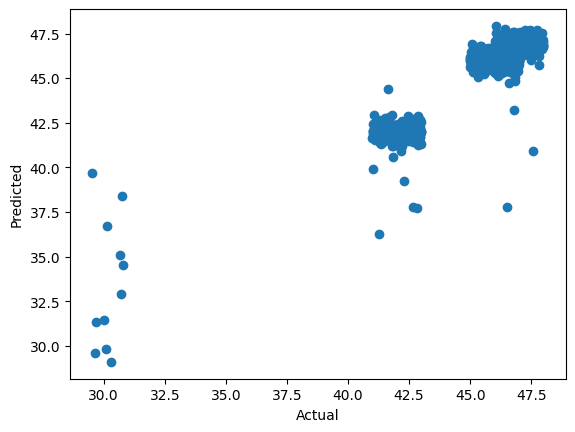

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()